<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/DerivativesIntegrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Forward Derivative

The forward derivative is a numerical approximation method for calculating derivatives when an analytical solution is difficult or impossible to obtain. It provides a way to estimate the instantaneous rate of change of a function at a point using discrete data points.

## Definition

The forward derivative of a function $f(x)$ at point $x$ is defined as:

$$f'(x) \approx \frac{f(x + \delta) - f(x)}{\delta}$$

where $\delta$ is a small positive step size (also called the increment or spacing).

## Conceptual Understanding

The forward derivative represents the slope of a secant line connecting two points on the function: the point of interest $(x, f(x))$ and a point slightly ahead $(x + \delta, f(x + \delta))$. As $\delta$ approaches zero, this secant line approaches the tangent line at point $x$, which gives us the true derivative.

Think of it as asking: "If I move a small distance $\delta$ forward from point $x$, how much does my function value change per unit of that forward movement?"

## Geometric Interpretation

Imagine standing on the curve $y = f(x)$ at position $x$. The forward derivative tells you the slope of the line segment that connects your current position to a point $\delta$ units ahead of you on the curve. This gives you information about how steeply the function is rising or falling in the forward direction.

## Relationship to the True Derivative

The forward derivative is based on the definition of the derivative as a limit:

$$f'(x) = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}$$

The forward difference approximation simply uses a finite (small) value of $\delta$ instead of taking the limit as $\delta \to 0$.

## Error Analysis

The forward derivative has a truncation error of order $O(\delta)$, meaning the error is proportional to the step size $\delta$. This can be seen from the Taylor series expansion:

$$f(x + \delta) = f(x) + \delta f'(x) + \frac{\delta^2}{2}f''(x) + O(\delta^3)$$

Rearranging to solve for $f'(x)$:

$$f'(x) = \frac{f(x + \delta) - f(x)}{\delta} - \frac{\delta}{2}f''(x) + O(\delta^2)$$

The error term $-\frac{\delta}{2}f''(x)$ shows that the approximation becomes more accurate as $\delta$ decreases, but the error is first-order in $\delta$.

## Practical Considerations

**Choosing step size $\delta$:** The step size must be small enough to provide a good approximation but large enough to avoid numerical precision issues. Too small a $\delta$ can lead to round-off errors dominating the calculation.

**Applications:** Forward derivatives are commonly used in numerical methods, finite difference schemes for solving differential equations, and situations where you only have access to function values at discrete points (such as experimental data).

The forward derivative is one of several finite difference approximations, alongside backward derivatives and central derivatives, each with their own advantages depending on the specific application and available data points.

In [2]:
def numerical_derivative_forward(func, x, delta=0.001):
  """
  Calculates the numerical derivative of a function at a given position using the forward difference method.

  Args:
    func: The function to differentiate.
    x: The position at which to calculate the derivative.
    delta: The step size for the forward difference (optional, defaults to 0.001).

  Returns:
    The numerical derivative of the function at position x.
  """
  return (func(x + delta) - func(x)) / delta

In [15]:
# Example usage:
# Define a sample function
def my_function(x):
  return x**2 + 2*x + 1

# Calculate the numerical derivative at x = 1
x_value = 1
derivative_at_x = numerical_derivative_forward(my_function, x_value)

# Print the result
print(f"The numerical derivative of my_function at x = {x_value} is: {derivative_at_x}")

# Calculate the numerical derivative at x = 1 with a different delta
derivative_at_x_with_delta = numerical_derivative_forward(my_function, x_value, delta=0.01)

# Print the result
print(f"The numerical derivative of my_function at x = {x_value} with delta = 0.01 is: {derivative_at_x_with_delta}")

The numerical derivative of my_function at x = 1 is: 4.100000000000001
The numerical derivative of my_function at x = 1 with delta = 0.01 is: 4.00999999999998


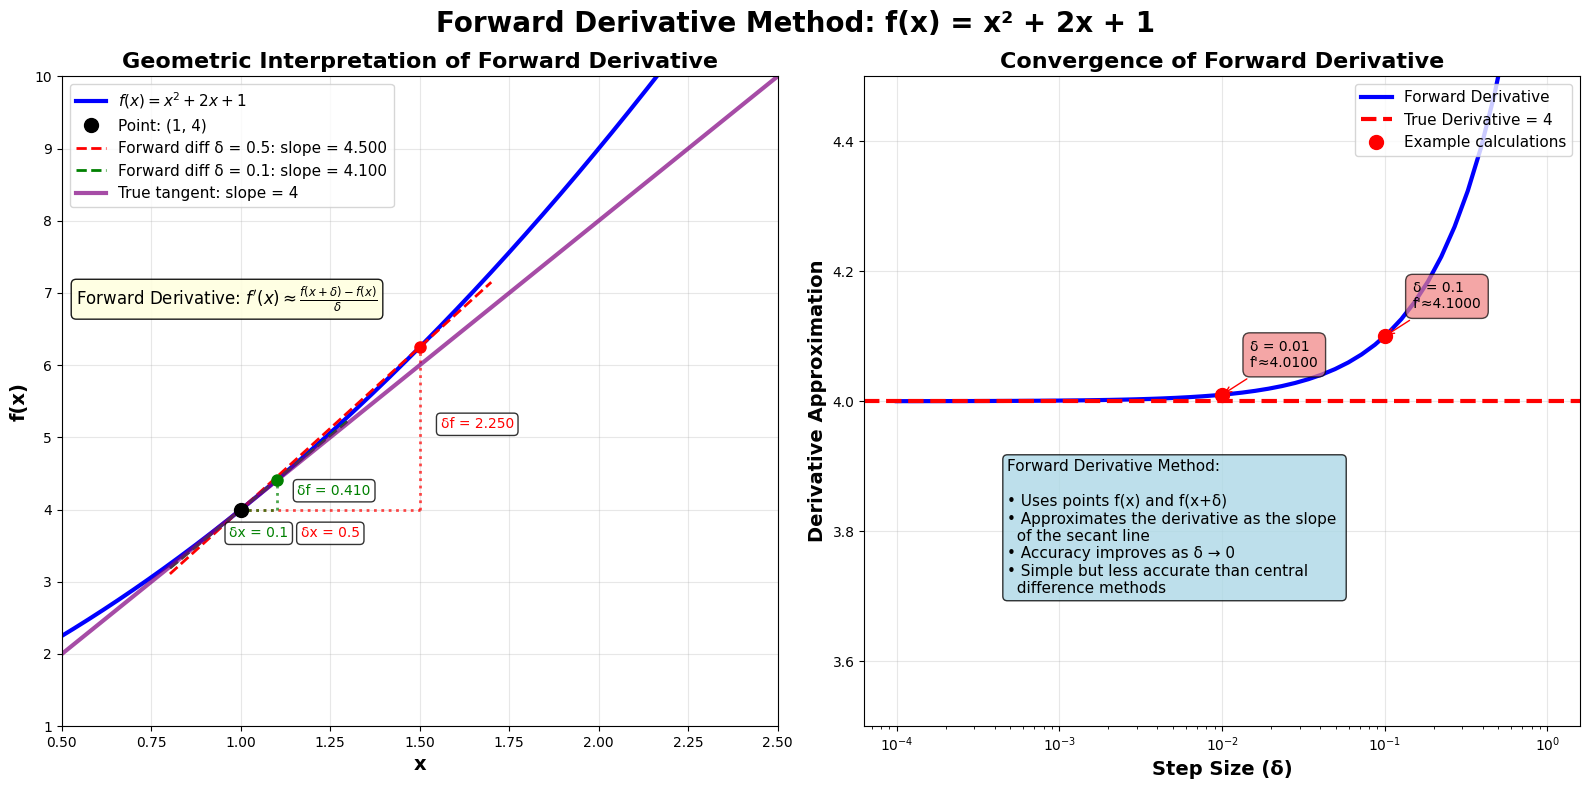

Forward Derivative Calculation Results:
Function: f(x) = x² + 2x + 1
Point of evaluation: x = 1
True analytical derivative: f'(1) = 4

Forward derivative with default δ=0.1: 4.100000
Forward derivative with δ=0.01: 4.010000

Error Analysis:
Error with δ=0.1: 0.100000
Error with δ=0.01: 0.010000
Improvement factor: 10.00x better

Calculation Details:
f(1) = 4
f(1.1) = 4.41
Forward diff = (4.41 - 4) / 0.1 = 4.100000000000001


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the forward derivative function
def numerical_derivative_forward(func, x, delta=0.1):
    """Calculate forward derivative using (f(x+h) - f(x))/h"""
    return (func(x + delta) - func(x)) / delta

# Define the sample function from the example
def my_function(x):
    return x**2 + 2*x + 1

# Analytical derivative for comparison
def analytical_derivative(x):
    return 2*x + 2

# Set up the figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.patch.set_facecolor('white')
fig.suptitle('Forward Derivative Method: f(x) = x² + 2x + 1', fontsize=20, fontweight='bold')

# ============ LEFT PLOT: Geometric Interpretation ============
x_value = 1
deltas = [0.5, 0.1]  # Two different step sizes
colors = ['red', 'green']
labels = ['δ = 0.5', 'δ = 0.1']

# Create smooth curve
x_smooth = np.linspace(0, 3, 1000)
y_smooth = my_function(x_smooth)
ax1.plot(x_smooth, y_smooth, 'b-', linewidth=3, label=r'$f(x) = x^2 + 2x + 1$')

# Point of interest
f_at_x = my_function(x_value)
ax1.plot(x_value, f_at_x, 'ko', markersize=10, zorder=5, label=f'Point: ({x_value}, {f_at_x})')

# Plot forward differences with different step sizes
for i, (delta, color, label_delta) in enumerate(zip(deltas, colors, labels)):
    x_forward = x_value + delta
    f_forward = my_function(x_forward)

    # Plot the forward point
    ax1.plot(x_forward, f_forward, 'o', color=color, markersize=8, zorder=5)

    # Draw the secant line (forward difference approximation)
    slope = numerical_derivative_forward(my_function, x_value, delta)
    y_secant = f_at_x + slope * (x_smooth - x_value)

    # Only plot secant line in a limited range for clarity
    mask = (x_smooth >= x_value - 0.2) & (x_smooth <= x_forward + 0.2)
    ax1.plot(x_smooth[mask], y_secant[mask], '--', color=color, linewidth=2,
             label=f'Forward diff {label_delta}: slope = {slope:.3f}')

    # Draw vertical and horizontal lines to show the calculation
    ax1.plot([x_value, x_forward], [f_at_x, f_at_x], ':', color=color, linewidth=2, alpha=0.7)
    ax1.plot([x_forward, x_forward], [f_at_x, f_forward], ':', color=color, linewidth=2, alpha=0.7)

    # Add annotations for the calculation
    mid_x = (x_value + x_forward) / 2
    ax1.annotate(f'δx = {delta}', xy=(mid_x, f_at_x), xytext=(0, -20),
                textcoords='offset points', ha='center', fontsize=10, color=color,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    ax1.annotate(f'δf = {f_forward - f_at_x:.3f}',
                xy=(x_forward, (f_at_x + f_forward)/2), xytext=(15, 0),
                textcoords='offset points', ha='left', fontsize=10, color=color,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# True tangent line at x=1
true_slope = analytical_derivative(x_value)
x_tangent = np.linspace(0.5, 2.5, 100)
y_tangent = f_at_x + true_slope * (x_tangent - x_value)
ax1.plot(x_tangent, y_tangent, 'purple', linewidth=3, alpha=0.7,
         label=f'True tangent: slope = {true_slope}')

ax1.set_xlim(0.5, 2.5)
ax1.set_ylim(1, 10)
ax1.set_xlabel('x', fontsize=14, fontweight='bold')
ax1.set_ylabel('f(x)', fontsize=14, fontweight='bold')
ax1.set_title('Geometric Interpretation of Forward Derivative', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=11)

# Add formula box
formula_text = r"Forward Derivative: $f'(x) \approx \frac{f(x+\delta) - f(x)}{\delta}$"
ax1.text(0.02, 0.68, formula_text, transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

# ============ RIGHT PLOT: Convergence Analysis ============
# Show how forward derivative converges to true derivative as delta decreases
delta_values = np.logspace(-4, 0, 50)  # From 0.0001 to 1
forward_derivatives = [numerical_derivative_forward(my_function, x_value, delta) for delta in delta_values]
true_derivative = analytical_derivative(x_value)

ax2.semilogx(delta_values, forward_derivatives, 'b-', linewidth=3, label='Forward Derivative')
ax2.axhline(y=true_derivative, color='red', linestyle='--', linewidth=3,
            label=f'True Derivative = {true_derivative}')

# Mark the specific examples from the code
example_deltas = [0.1, 0.01]
example_derivatives = [numerical_derivative_forward(my_function, x_value, delta) for delta in example_deltas]

ax2.semilogx(example_deltas, example_derivatives, 'ro', markersize=10, zorder=5,
             label='Example calculations')

# Add annotations for the examples
for delta, deriv in zip(example_deltas, example_derivatives):
    ax2.annotate(f'δ = {delta}\nf\'≈{deriv:.4f}',
                xy=(delta, deriv), xytext=(20, 20),
                textcoords='offset points', ha='left', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='red'))

ax2.set_xlabel('Step Size (δ)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Derivative Approximation', fontsize=14, fontweight='bold')
ax2.set_title('Convergence of Forward Derivative', fontsize=16, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=11)
ax2.set_ylim(3.5, 4.5)

# Add explanation text box
explanation_text = """Forward Derivative Method:

• Uses points f(x) and f(x+δ)
• Approximates the derivative as the slope
  of the secant line
• Accuracy improves as δ → 0
• Simple but less accurate than central
  difference methods"""

ax2.text(0.2, 0.2, explanation_text, transform=ax2.transAxes, fontsize=11,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# ============ NUMERICAL CALCULATIONS (matching the example) ============
print("Forward Derivative Calculation Results:")
print("=" * 50)
print(f"Function: f(x) = x² + 2x + 1")
print(f"Point of evaluation: x = {x_value}")
print(f"True analytical derivative: f'({x_value}) = {analytical_derivative(x_value)}")
print()

# Example calculations matching the provided code
derivative_default = numerical_derivative_forward(my_function, x_value)
derivative_small_delta = numerical_derivative_forward(my_function, x_value, delta=0.01)

print(f"Forward derivative with default δ=0.1: {derivative_default:.6f}")
print(f"Forward derivative with δ=0.01: {derivative_small_delta:.6f}")
print()

# Error analysis
error_default = abs(derivative_default - true_derivative)
error_small = abs(derivative_small_delta - true_derivative)

print("Error Analysis:")
print(f"Error with δ=0.1: {error_default:.6f}")
print(f"Error with δ=0.01: {error_small:.6f}")
print(f"Improvement factor: {error_default/error_small:.2f}x better")

# Show the calculation steps
print("\nCalculation Details:")
print(f"f({x_value}) = {my_function(x_value)}")
print(f"f({x_value + 0.1}) = {my_function(x_value + 0.1)}")
print(f"Forward diff = ({my_function(x_value + 0.1)} - {my_function(x_value)}) / 0.1 = {derivative_default}")

# Optional: Analytical Derivatives with SymPy
While numerical methods like the forward derivative are useful for approximating derivatives, Python's SymPy library allows us to compute exact analytical derivatives symbolically. This means we get the precise mathematical expression for the derivative, not just a numerical approximation.
## What is SymPy?
SymPy (Symbolic Python) is a Python library for symbolic mathematics. Unlike numerical libraries that work with floating-point approximations, SymPy performs exact symbolic computations, treating variables as mathematical symbols rather than numeric values.
### Basic Setup and Usage
First, you need to import SymPy and define symbolic variables:


In [4]:
import sympy as sp

def calculate_derivative(func, variable):
  """
  Calculates the derivative of a function with respect to a variable.

  Args:
    func: The function to differentiate (as a SymPy expression).
    variable: The variable to differentiate with respect to (as a SymPy symbol).

  Returns:
    The derivative of the function.
  """
  return sp.diff(func, variable)

# Example usage:
# Define a variable
x = sp.Symbol('x')

# Define a function
f = x**2 + 2*x + 1

# Calculate the derivative
derivative_f = calculate_derivative(f, x)

# Print the derivative
print(f"The derivative of {f} with respect to {x} is: {derivative_f}")

The derivative of x**2 + 2*x + 1 with respect to x is: 2*x + 2


# The Trapezoidal Rule for Numerical Integration

The trapezoidal rule is a numerical integration method that approximates the definite integral of a function by dividing the integration region into trapezoids and summing their areas. It's one of the most intuitive and widely-used numerical integration techniques.

## Mathematical Foundation

The definite integral $\int_a^b f(x) \, dx$ represents the area under the curve $f(x)$ from $x = a$ to $x = b$. The trapezoidal rule approximates this area by:

1. Dividing the interval $[a, b]$ into $n$ equal subintervals of width $\delta = \frac{b-a}{n}$
2. Approximating the curve over each subinterval with a straight line
3. Calculating the area of each resulting trapezoid
4. Summing all trapezoid areas

## The Trapezoidal Formula

For a single interval $[x_i, x_{i+1}]$, the area of the trapezoid is:

$$A_i = \frac{1}{2}(f(x_i) + f(x_{i+1})) \cdot \delta$$

This comes from the standard trapezoid area formula: $A = \frac{1}{2}(b_1 + b_2) \cdot h$, where:
- $b_1 = f(x_i)$ and $b_2 = f(x_{i+1})$ are the parallel sides (function values)
- $h = \delta$ is the height (interval width)

The complete integral approximation becomes:

$$\int_a^b f(x) \, dx \approx \sum_{i=0}^{n-1} \frac{1}{2}(f(x_i) + f(x_{i+1})) \cdot \delta$$


The trapezoidal rule is an excellent starting point for numerical integration and provides a solid foundation for understanding more sophisticated methods like Simpson's rule and Gaussian quadrature.




In [5]:
def numerical_integral_trapezoidal(func, a, b, delta=0.001):
  """
  Calculates the numerical integral of a function using the trapezoidal rule.
  Note that it is possible to write the function below more compactly
  but that makes it harder to understand what is going on.

  Args:
    func: The function to integrate.
    a: The lower bound of integration.
    b: The upper bound of integration.
    delta: The width of each trapezoid (optional, defaults to 0.001).

  Returns:
    The numerical integral of the function from a to b.
  """
  n = int((b - a) / delta)  # Number of trapezoids
  integral = 0.0
  for i in range(n):
    x0 = a + i * delta
    x1 = a + (i + 1) * delta
    integral += (func(x0) + func(x1)) * delta / 2
  return integral



### How the Code Works:

1. **Calculate number of intervals:** `n = int((b - a) / delta)` determines how many trapezoids fit in the interval $[a, b]$

2. **Loop through each interval:** For each $i$ from $0$ to $n-1$:
   - `x0 = a + i * delta` gives the left endpoint
   - `x1 = a + (i + 1) * delta` gives the right endpoint
   - The trapezoid area is calculated as `(func(x0) + func(x1)) * delta / 2`

3. **Accumulate the sum:** Each trapezoid area is added to the running total

## Geometric Interpretation

Imagine the function $f(x) = x^2$ from $x = 0$ to $x = 2$:

- The exact integral is $\int_0^2 x^2 \, dx = \frac{x^3}{3}\Big|_0^2 = \frac{8}{3} \approx 2.667$
- With $\delta = 0.5$, we have 4 trapezoids:
  - Trapezoid 1: $x \in [0, 0.5]$, area = $\frac{1}{2}(0 + 0.25) \cdot 0.5 = 0.0625$
  - Trapezoid 2: $x \in [0.5, 1.0]$, area = $\frac{1}{2}(0.25 + 1) \cdot 0.5 = 0.3125$
  - Trapezoid 3: $x \in [1.0, 1.5]$, area = $\frac{1}{2}(1 + 2.25) \cdot 0.5 = 0.8125$
  - Trapezoid 4: $x \in [1.5, 2.0]$, area = $\frac{1}{2}(2.25 + 4) \cdot 0.5 = 1.5625$
  - Total ≈ 2.75 (compared to exact value of 2.667)


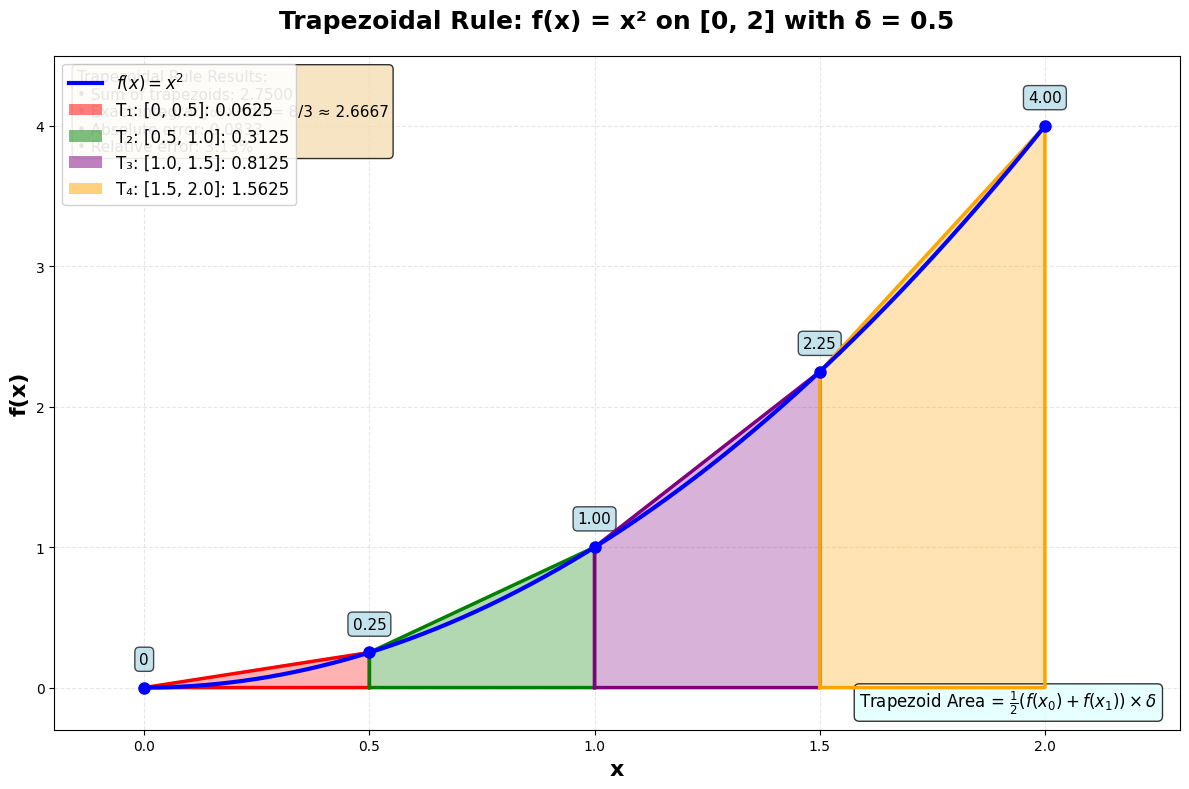

Trapezoidal Rule Calculation Details:
Trapezoid 1: [0.0, 0.5] → Area = 0.0625
Trapezoid 2: [0.5, 1.0] → Area = 0.3125
Trapezoid 3: [1.0, 1.5] → Area = 0.8125
Trapezoid 4: [1.5, 2.0] → Area = 1.5625

Total approximation: 2.7500
Exact value: 2.6667
Error: 0.0833
Relative error: 3.13%


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure with a clean, academic style
plt.style.use('default')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fig.patch.set_facecolor('white')

# Define the function and parameters
def f(x):
    return x**2

a, b = 0, 2
delta = 0.5
n = int((b - a) / delta)

# Create smooth curve for the function
x_smooth = np.linspace(a, b, 1000)
y_smooth = f(x_smooth)

# Plot the smooth function curve
ax.plot(x_smooth, y_smooth, 'b-', linewidth=3, label=r'$f(x) = x^2$', zorder=5)

# Colors for each trapezoid
colors = ['red', 'green', 'purple', 'orange']
alphas = [0.3, 0.3, 0.3, 0.3]

# Calculate and plot trapezoids
trapezoid_areas = []
trapezoid_labels = []

for i in range(n):
    x0 = a + i * delta
    x1 = a + (i + 1) * delta
    y0 = f(x0)
    y1 = f(x1)

    # Calculate trapezoid area
    area = (y0 + y1) * delta / 2
    trapezoid_areas.append(area)

    # Create trapezoid vertices
    x_trap = [x0, x1, x1, x0, x0]
    y_trap = [0, 0, y1, y0, 0]

    # Plot filled trapezoid
    ax.fill(x_trap, y_trap, color=colors[i], alpha=alphas[i],
            edgecolor=colors[i], linewidth=2, zorder=3)

    # Plot trapezoid outline more prominently
    ax.plot(x_trap, y_trap, color=colors[i], linewidth=2.5, zorder=4)

    # Add trapezoid label
    trapezoid_labels.append(f'T₁₊{i}: {area:.4f}' if i == 0 else f'T₁₊{i}: {area:.4f}')

# Plot function points at interval boundaries
x_points = [a + i * delta for i in range(n + 1)]
y_points = [f(x) for x in x_points]

ax.plot(x_points, y_points, 'bo', markersize=8, zorder=6)

# Add function value labels
for x, y in zip(x_points, y_points):
    ax.annotate(f'{y:.2f}' if y != 0 else '0',
                (x, y), xytext=(0, 15), textcoords='offset points',
                ha='center', va='bottom', fontsize=11,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))

# Customize the plot
ax.set_xlim(-0.2, 2.3)
ax.set_ylim(-0.3, 4.5)
ax.set_xlabel('x', fontsize=16, fontweight='bold')
ax.set_ylabel('f(x)', fontsize=16, fontweight='bold')
ax.set_title('Trapezoidal Rule: f(x) = x² on [0, 2] with δ = 0.5',
             fontsize=18, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Set custom tick marks
ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
ax.set_yticks([0, 1, 2, 3, 4])

# Create legend with trapezoid information
legend_elements = []
trapezoid_names = ['T₁: [0, 0.5]', 'T₂: [0.5, 1.0]', 'T₃: [1.0, 1.5]', 'T₄: [1.5, 2.0]']

for i, (name, area, color) in enumerate(zip(trapezoid_names, trapezoid_areas, colors)):
    legend_elements.append(plt.Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.5,
                                       label=f'{name}: {area:.4f}'))

# Add function line to legend
legend_elements.insert(0, plt.Line2D([0], [0], color='blue', linewidth=3,
                                   label=r'$f(x) = x^2$'))

# Position legend
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, framealpha=0.9)

# Add calculation summary
total_area = sum(trapezoid_areas)
exact_area = 8/3
error = total_area - exact_area

# Create text box with calculations
textstr = f'''Trapezoidal Rule Results:
• Sum of trapezoids: {total_area:.4f}
• Exact integral ∫₀² x² dx = 8/3 ≈ {exact_area:.4f}
• Absolute error: {error:.4f}
• Relative error: {100*error/exact_area:.2f}%'''

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Add formula box
formula_text = r'Trapezoid Area = $\frac{1}{2}(f(x_0) + f(x_1)) \times \delta$'
ax.text(0.98, 0.02, formula_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

# Tighten layout and display
plt.tight_layout()
plt.show()

# Print numerical results for verification
print("Trapezoidal Rule Calculation Details:")
print("=" * 40)
for i, (x0, area) in enumerate(zip(x_points[:-1], trapezoid_areas)):
    x1 = x0 + delta
    print(f"Trapezoid {i+1}: [{x0:.1f}, {x1:.1f}] → Area = {area:.4f}")

print(f"\nTotal approximation: {total_area:.4f}")
print(f"Exact value: {exact_area:.4f}")
print(f"Error: {error:.4f}")
print(f"Relative error: {100*error/exact_area:.2f}%")

In [17]:
# Example usage:
# Define a sample function
def my_function(x):
  return x**2 + 2*x + 1

# Calculate the numerical integral from 0 to 2
a_value = 0
b_value = 2
integral_result = numerical_integral_trapezoidal(my_function, a_value, b_value)

# Print the result
print(f"The numerical integral of my_function from {a_value} to {b_value} is: {integral_result}")

# Calculate the numerical integral from 0 to 2 with a different delta
integral_result_with_delta = numerical_integral_trapezoidal(my_function, a_value, b_value, delta=0.01)

# Print the result
print(f"The numerical integral of my_function from {a_value} to {b_value} with delta = 0.01 is: {integral_result_with_delta}")

The numerical integral of my_function from 0 to 2 is: 8.666666999999986
The numerical integral of my_function from 0 to 2 with delta = 0.01 is: 8.666699999999995


## Optional: Analytical Integration with SymPy

SymPy can also be used to perform symbolic integration, both indefinite and definite.

### Indefinite Integration

To find the indefinite integral of a function, you use the `integrate()` function. You need to define your symbolic variable and the function you want to integrate.

In [10]:
import sympy as sp

# Define the symbolic variable
x = sp.Symbol('x')

# Define the function to integrate
f = x**2 + 2*x + 1


# Calculate the indefinite integral
indefinite_integral = sp.integrate(f, (x))

# Print the result
print(f"The indefinite integral of {f} is: {indefinite_integral}")

# Define the limits of integration
a = 0
b = 2

# Calculate the definite integral
definite_integral = sp.integrate(f, (x, a, b))

# Print the result
print(f"The definite integral of {f} from {a} to {b} is: {definite_integral}")

The indefinite integral of x**2 + 2*x + 1 is: x**3/3 + x**2 + x
The definite integral of x**2 + 2*x + 1 from 0 to 2 is: 26/3
